In [22]:
import glob
import re
import pandas as pd

In [23]:
def load_hogar_ccaa_data(
    path_pattern: str = '../../datamarts/picotaData_supercategory/hogarCCAA*.tsv',
    sort_by_ccaa: bool = True,
    ccaa_column_name: str = 'ccaa'
) -> pd.DataFrame:
    """
    Lee todos los ficheros TSV de hogares por CCAA, añade una columna con el código
    de CCAA extraído del nombre de fichero, concatena todo en un único DataFrame y
    opcionalmente ordena por CCAA.

    Parameters
    ----------
    path_pattern : str
        Patrón glob para localizar los archivos (por defecto '../../datamarts/picotaData/hogarCCAA*.tsv').
    sort_by_ccaa : bool
        Si True, ordena el DataFrame resultante por la columna de CCAA.
    ccaa_column_name : str
        Nombre de la columna donde se almacenará el código de CCAA.

    Returns
    -------
    pd.DataFrame
        DataFrame con todos los datos concatenados y la columna de CCAA.
    """
    files = glob.glob(path_pattern)
    dfs = []

    for fp in files:
        m = re.search(r'hogarCCAA(\d+)\.tsv$', fp)
        if not m:
            continue
        code = m.group(1).zfill(2)  # si quieres siempre dos dígitos, ojo

        df = pd.read_csv(fp, sep='\t')
        df[ccaa_column_name] = code
        dfs.append(df)

    if not dfs:
        raise FileNotFoundError(f"No se encontraron archivos con patrón {path_pattern}")

    big_df = pd.concat(dfs, ignore_index=True)

    if sort_by_ccaa:
        big_df.sort_values(ccaa_column_name, inplace=True)

    return big_df



In [24]:
df = load_hogar_ccaa_data()
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
df.head()

,timestamp,capitalProvincia,tamanoMunicipio,densidad,superficie,tipoCasa,aguaCaliente,calefaccion,zonaResidencial,regimenTenencia,comidasTotales,miembros:estudiantes,miembros:noEstudiantes,miembros:ocupados,miembros:noOcupados,miembros:activos,miembros:noActivos,miembros:ancianos:masculinos,miembros:ancianos:femeninos,miembros:adultos:masculinos,miembros:adultos:femeninos,miembros:niños:femeninos,miembros:niños:masculinos,miembros:conIngresos:masculinos,miembros:conIngresos:femeninos,miembros:sinIngresos:masculinos,miembros:sinIngresos:femeninos,edadSp,espanolSp,educacionSuperiorSp,fuentePrincipalIngresos,numeroViviendasAdicionales,ingresosNetos,gastoNoMonetario,tasaAhorro,temperaturaMedia,tasaParo,inflacion,tipoInteres,tasaCambioEurUsd,ipc,ALIMENTOS_BEBIDAS_NO_ALCOHÓLICAS_1,BEBIDAS_ALCOHÓLICAS_TABACO_NARCÓTICO_2,ARTÍCULOS_DE_VESTIR_CALZADO_3,VIVIENDA_AGUA_ELECTRICIDAD_GAS_OTROS_COMBUSTIBLES_4,MOBILIARIO_EQUIPAMIENTO_DEL_HOGAR_GASTOS_DE_CONSERVACIÓN_5,SALUD_6,TRANSPORTES_7,COMUNICACIONES_8,OCIO_ESPECTÁCULOS_CULTURA__9,ENSEÑANZA_10,HOTELES_CAFÉS_RESTAURANTES_11,OTROS_BIENES_SERVICIOS_12,ccaa
0,2006-01-01T00:00:00,0,3,1,90.0,2,1,0,5,6,68.0,2,3,3.0,2,3.0,2,0,0,0,2,1,2,2,1,0,2,47,1,0,asalariado,0.0,25097.315845,2766.339719,0.636083,19.62,12.6,2.9,3.50,1.26,81.547750,1124.040435,265.262879,1442.416574,1005.294153,212.142395,415.723961,2245.277830,909.167244,343.328969,1.502660,514.162656,655.022605,01
7063,2015-01-01T00:00:00,0,5,3,89.0,2,1,0,5,6,112.0,0,4,2.0,2,2.0,2,1,1,2,0,0,0,3,0,0,1,72,1,0,pension,1.0,97061.699578,7669.266451,0.757534,19.62,31.5,0.0,0.05,1.11,93.537667,10034.952247,935.360384,591.201609,2703.590426,367.342668,292.933958,2902.424569,651.072103,1129.920998,5.144671,2598.897191,1321.317557,01
7064,2015-01-01T00:00:00,0,4,2,200.0,3,1,1,5,6,63.0,2,2,2.0,2,2.0,2,0,0,1,1,0,2,1,1,2,0,52,1,1,asalariado,1.0,31558.366049,11265.514847,0.099772,19.62,31.5,0.0,0.05,1.11,93.537667,1286.422551,366.068828,55.942135,8092.592345,308.072112,409.741004,5294.713082,871.725897,2565.029475,1198.026253,6946.908601,1014.461757,01
7065,2015-01-01T00:00:00,0,1,1,150.0,2,1,0,1,6,104.0,0,3,1.0,3,2.0,2,1,0,1,1,0,1,2,1,1,0,69,1,0,pension,0.0,18037.578595,3719.054819,-0.116934,19.62,31.5,0.0,0.05,1.11,93.537667,9293.108751,916.959555,499.772749,1306.713594,635.399758,920.772858,681.504558,511.804376,3160.907311,0.073965,1650.173811,569.595634,01
7066,2015-01-01T00:00:00,1,5,3,80.0,2,1,0,6,6,86.0,0,2,2.0,1,2.0,1,0,0,1,1,1,0,1,1,0,1,56,1,1,asalariado,1.0,26952.817003,11648.307965,0.125773,19.62,31.5,0.0,0.05,1.11,93.537667,6046.689773,128.559250,3539.640577,3065.739113,86.990965,1278.919221,1107.008309,853.941443,2667.339397,57.684420,1455.662507,3274.714669,01


Convertimos en dummies las variables categoricas

In [25]:
df = pd.get_dummies(df, columns=['ccaa', 'fuentePrincipalIngresos'], prefix=['ccaa', 'fuentePrincipalIngresos'])

df.rename(columns=lambda x: re.sub(r'^ccaa_(\d+)$', r'ccaa_\1', x), inplace=True)
df.rename(columns=lambda x: re.sub(r'^fuentePrincipalIngresos_(\d+)$', r'fuentePrincipalIngresos_\1', x), inplace=True)


In [26]:
df['miembros:total'] = df['miembros:activos'] + df['miembros:noActivos']
df['miembros:niños'] = df['miembros:niños:masculinos'] + df['miembros:niños:femeninos']
df["miembros:adultos"] = df['miembros:adultos:masculinos'] + df['miembros:adultos:femeninos']
df["miembros:ancianos"] = df['miembros:ancianos:masculinos'] + df['miembros:ancianos:femeninos']

In [27]:
df.head(
)

,timestamp,capitalProvincia,tamanoMunicipio,densidad,superficie,tipoCasa,aguaCaliente,calefaccion,zonaResidencial,regimenTenencia,comidasTotales,miembros:estudiantes,miembros:noEstudiantes,miembros:ocupados,miembros:noOcupados,miembros:activos,miembros:noActivos,miembros:ancianos:masculinos,miembros:ancianos:femeninos,miembros:adultos:masculinos,miembros:adultos:femeninos,miembros:niños:femeninos,miembros:niños:masculinos,miembros:conIngresos:masculinos,miembros:conIngresos:femeninos,miembros:sinIngresos:masculinos,miembros:sinIngresos:femeninos,edadSp,espanolSp,educacionSuperiorSp,numeroViviendasAdicionales,ingresosNetos,gastoNoMonetario,tasaAhorro,temperaturaMedia,tasaParo,inflacion,tipoInteres,tasaCambioEurUsd,ipc,ALIMENTOS_BEBIDAS_NO_ALCOHÓLICAS_1,BEBIDAS_ALCOHÓLICAS_TABACO_NARCÓTICO_2,ARTÍCULOS_DE_VESTIR_CALZADO_3,VIVIENDA_AGUA_ELECTRICIDAD_GAS_OTROS_COMBUSTIBLES_4,MOBILIARIO_EQUIPAMIENTO_DEL_HOGAR_GASTOS_DE_CONSERVACIÓN_5,SALUD_6,TRANSPORTES_7,COMUNICACIONES_8,OCIO_ESPECTÁCULOS_CULTURA__9,ENSEÑANZA_10,HOTELES_CAFÉS_RESTAURANTES_11,OTROS_BIENES_SERVICIOS_12,ccaa_01,ccaa_02,ccaa_03,ccaa_04,ccaa_05,ccaa_06,ccaa_07,ccaa_08,ccaa_09,ccaa_10,ccaa_11,ccaa_12,ccaa_13,ccaa_14,ccaa_15,ccaa_16,ccaa_17,ccaa_18,ccaa_19,fuentePrincipalIngresos_asalariado,fuentePrincipalIngresos_autonomYRenta,fuentePrincipalIngresos_pension,miembros:total,miembros:niños,miembros:adultos,miembros:ancianos
0,2006-01-01T00:00:00,0,3,1,90.0,2,1,0,5,6,68.0,2,3,3.0,2,3.0,2,0,0,0,2,1,2,2,1,0,2,47,1,0,0.0,25097.315845,2766.339719,0.636083,19.62,12.6,2.9,3.50,1.26,81.547750,1124.040435,265.262879,1442.416574,1005.294153,212.142395,415.723961,2245.277830,909.167244,343.328969,1.502660,514.162656,655.022605,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5.0,3,2,0
7063,2015-01-01T00:00:00,0,5,3,89.0,2,1,0,5,6,112.0,0,4,2.0,2,2.0,2,1,1,2,0,0,0,3,0,0,1,72,1,0,1.0,97061.699578,7669.266451,0.757534,19.62,31.5,0.0,0.05,1.11,93.537667,10034.952247,935.360384,591.201609,2703.590426,367.342668,292.933958,2902.424569,651.072103,1129.920998,5.144671,2598.897191,1321.317557,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.0,0,2,2
7064,2015-01-01T00:00:00,0,4,2,200.0,3,1,1,5,6,63.0,2,2,2.0,2,2.0,2,0,0,1,1,0,2,1,1,2,0,52,1,1,1.0,31558.366049,11265.514847,0.099772,19.62,31.5,0.0,0.05,1.11,93.537667,1286.422551,366.068828,55.942135,8092.592345,308.072112,409.741004,5294.713082,871.725897,2565.029475,1198.026253,6946.908601,1014.461757,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4.0,2,2,0
7065,2015-01-01T00:00:00,0,1,1,150.0,2,1,0,1,6,104.0,0,3,1.0,3,2.0,2,1,0,1,1,0,1,2,1,1,0,69,1,0,0.0,18037.578595,3719.054819,-0.116934,19.62,31.5,0.0,0.05,1.11,93.537667,9293.108751,916.959555,499.772749,1306.713594,635.399758,920.772858,681.504558,511.804376,3160.907311,0.073965,1650.173811,569.595634,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.0,1,2,1
7066,2015-01-01T00:00:00,1,5,3,80.0,2,1,0,6,6,86.0,0,2,2.0,1,2.0,1,0,0,1,1,1,0,1,1,0,1,56,1,1,1.0,26952.817003,11648.307965,0.125773,19.62,31.5,0.0,0.05,1.11,93.537667,6046.689773,128.559250,3539.640577,3065.739113,86.990965,1278.919221,1107.008309,853.941443,2667.339397,57.684420,1455.662507,3274.714669,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.0,1,2,0


In [28]:
output_columns = [col for col in df.columns if col.startswith("gastoMonetario:")]


## Analísis de sensibilidad no lineal por código

### 🗂 Categorías por código (Super_Categoría)

| Código | Grupo de Gasto |
|--------|----------------|
| 1 | Alimentos y bebidas no alcohólicas |
| 2 | Bebidas alcohólicas, tabaco y narcóticos |
| 3 | Artículos de vestir y calzado |
| 4 | Vivienda, agua, electricidad, gas y otros combustibles |
| 5 | Mobiliario, equipamiento del hogar y gastos de conservación |
| 6 | Salud |
| 7 | Transportes |
| 8 | Comunicaciones |
| 9 | Ocio, espectáculos y cultura |
| 10 | Enseñanza |
| 11 | Hoteles, cafés y restaurantes |
| 12 | Otros bienes y servicios |



In [29]:
df

,timestamp,capitalProvincia,tamanoMunicipio,densidad,superficie,tipoCasa,aguaCaliente,calefaccion,zonaResidencial,regimenTenencia,comidasTotales,miembros:estudiantes,miembros:noEstudiantes,miembros:ocupados,miembros:noOcupados,miembros:activos,miembros:noActivos,miembros:ancianos:masculinos,miembros:ancianos:femeninos,miembros:adultos:masculinos,miembros:adultos:femeninos,miembros:niños:femeninos,miembros:niños:masculinos,miembros:conIngresos:masculinos,miembros:conIngresos:femeninos,miembros:sinIngresos:masculinos,miembros:sinIngresos:femeninos,edadSp,espanolSp,educacionSuperiorSp,numeroViviendasAdicionales,ingresosNetos,gastoNoMonetario,tasaAhorro,temperaturaMedia,tasaParo,inflacion,tipoInteres,tasaCambioEurUsd,ipc,ALIMENTOS_BEBIDAS_NO_ALCOHÓLICAS_1,BEBIDAS_ALCOHÓLICAS_TABACO_NARCÓTICO_2,ARTÍCULOS_DE_VESTIR_CALZADO_3,VIVIENDA_AGUA_ELECTRICIDAD_GAS_OTROS_COMBUSTIBLES_4,MOBILIARIO_EQUIPAMIENTO_DEL_HOGAR_GASTOS_DE_CONSERVACIÓN_5,SALUD_6,TRANSPORTES_7,COMUNICACIONES_8,OCIO_ESPECTÁCULOS_CULTURA__9,ENSEÑANZA_10,HOTELES_CAFÉS_RESTAURANTES_11,OTROS_BIENES_SERVICIOS_12,ccaa_01,ccaa_02,ccaa_03,ccaa_04,ccaa_05,ccaa_06,ccaa_07,ccaa_08,ccaa_09,ccaa_10,ccaa_11,ccaa_12,ccaa_13,ccaa_14,ccaa_15,ccaa_16,ccaa_17,ccaa_18,ccaa_19,fuentePrincipalIngresos_asalariado,fuentePrincipalIngresos_autonomYRenta,fuentePrincipalIngresos_pension,miembros:total,miembros:niños,miembros:adultos,miembros:ancianos
0,2006-01-01T00:00:00,0,3,1,90.0,2,1,0,5,6,68.0,2,3,3.0,2,3.0,2,0,0,0,2,1,2,2,1,0,2,47,1,0,0.0,25097.315845,2766.339719,0.636083,19.62,12.6,2.9,3.50,1.26,81.547750,1124.040435,265.262879,1442.416574,1005.294153,212.142395,415.723961,2245.277830,909.167244,343.328969,1.502660,514.162656,655.022605,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5.0,3,2,0
7063,2015-01-01T00:00:00,0,5,3,89.0,2,1,0,5,6,112.0,0,4,2.0,2,2.0,2,1,1,2,0,0,0,3,0,0,1,72,1,0,1.0,97061.699578,7669.266451,0.757534,19.62,31.5,0.0,0.05,1.11,93.537667,10034.952247,935.360384,591.201609,2703.590426,367.342668,292.933958,2902.424569,651.072103,1129.920998,5.144671,2598.897191,1321.317557,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.0,0,2,2
7064,2015-01-01T00:00:00,0,4,2,200.0,3,1,1,5,6,63.0,2,2,2.0,2,2.0,2,0,0,1,1,0,2,1,1,2,0,52,1,1,1.0,31558.366049,11265.514847,0.099772,19.62,31.5,0.0,0.05,1.11,93.537667,1286.422551,366.068828,55.942135,8092.592345,308.072112,409.741004,5294.713082,871.725897,2565.029475,1198.026253,6946.908601,1014.461757,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4.0,2,2,0
7065,2015-01-01T00:00:00,0,1,1,150.0,2,1,0,1,6,104.0,0,3,1.0,3,2.0,2,1,0,1,1,0,1,2,1,1,0,69,1,0,0.0,18037.578595,3719.054819,-0.116934,19.62,31.5,0.0,0.05,1.11,93.537667,9293.108751,916.959555,499.772749,1306.713594,635.399758,920.772858,681.504558,511.804376,3160.907311,0.073965,1650.173811,569.595634,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.0,1,2,1
7066,2015-01-01T00:00:00,1,5,3,80.0,2,1,0,6,6,86.0,0,2,2.0,1,2.0,1,0,0,1,1,1,0,1,1,0,1,56,1,1,1.0,26952.817003,11648.307965,0.125773,19.62,31.5,0.0,0.05,1.11,93.537667,6046.689773,128.559250,3539.640577,3065.739113,86.990965,1278.919221,1107.008309,853.941443,2667.339397,57.684420,1455.662507,3274.714669,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84247,2014-01-01T00:00:00,0,4,3,135.0,3,1,1,6,5,111.0,0,2,2.0,2,2.0,2,0,0,1,1,1,1,1,1,1,1,43,1,1,0.0,43424.015101,6180.922539,0.347398,20.60,28.4,-0.6,0.05,1.33,94.163083,5600.540701,98.778739,195.733286,1320.681724,2349.682636,5356.156802,368.305116,1387.252338,3145.087967,1025.179189,3413.326680,4077.860706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,4.0,2,2,0
84248,2014-01-01T00:00:00,0,4,3,70.0,2,1,0,5,5,112.0,0,2,0.0,4,1.0,3,0,0,0,2,1,1,0,1,1,2,47,1,0,0.0,7933.995460,3631.627115,0.30

## MLP

In [30]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [31]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def train_mlp_per_category(df, output_columns, hidden_layer_sizes=(128, 64, 32), max_iter=500, top_n=10):
    r2_results = []
    mse_results = []
    all_importances = []

    excluded = output_columns + ["timestamp"]
    input_features = [col for col in df.select_dtypes(include="number").columns if col not in excluded]

    for target in output_columns:
        print(f"\n🔧 Training MLP for {target}...")

        df_clean = df.dropna(subset=[target] + input_features)
        if df_clean.shape[0] < len(input_features) + 10:
            print("❌ Not enough data. Skipping.")
            continue

        X = df_clean[input_features]
        y = df_clean[target]

        # Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Normalize
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # MLP model
        mlp = MLPRegressor(
            hidden_layer_sizes=hidden_layer_sizes,
            activation='relu',
            solver='adam',
            early_stopping=True,
            n_iter_no_change=10,
            validation_fraction=0.1,
            max_iter=max_iter,
            random_state=42
        )
        mlp.fit(X_train, y_train)

        # Predict & evaluate
        y_pred = mlp.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        print(f"✅ R² for {target}: {r2:.4f}, MSE: {mse:.4f}")

        # Permutation importance
        print("🔍 Calculating permutation importances...")
        result = permutation_importance(mlp, X_test, y_test, n_repeats=5, random_state=42, n_jobs=1)
        importances_df = pd.DataFrame({
            "Variable": df_clean[input_features].columns,
            "Importance": result.importances_mean,
            "Target": target
        }).sort_values(by="Importance", ascending=False)

        # Show top variables
        print(f"📊 Top {top_n} variables by importance for {target}:")
        print(importances_df.head(top_n).to_string(index=False))

        # Save results
        r2_results.append({"Target": target, "R2": r2})
        mse_results.append({"Target": target, "MSE": mse})
        all_importances.append(importances_df)

    r2_df = pd.DataFrame(r2_results).sort_values(by="R2", ascending=False)
    mse_df = pd.DataFrame(mse_results).sort_values(by="MSE", ascending=False)
    importances_df = pd.concat(all_importances, ignore_index=True)

    return r2_df, importances_df, mse_df


In [32]:
mlp_r2_df, mlp_importances_df, mse_df = train_mlp_per_category(df, output_columns)


KeyError: 'R2'

In [ ]:
mlp_importances_df.head(5)

,Variable,Importance,Target
0,tasaAhorro,0.308517,gastoMonetario:alimentosYBebidasNoAlcoholicas1
1,ingresosNetos,0.285557,gastoMonetario:alimentosYBebidasNoAlcoholicas1
2,ipc,0.203266,gastoMonetario:alimentosYBebidasNoAlcoholicas1
3,comidasTotales,0.200427,gastoMonetario:alimentosYBebidasNoAlcoholicas1
4,tasaParo,0.055978,gastoMonetario:alimentosYBebidasNoAlcoholicas1


### Analísis del r2 de nuestros modelos

In [ ]:
mlp_r2_df

,Target,R2
10,gastoMonetario:hotelesCafesYRestaurantes11,0.326524
0,gastoMonetario:alimentosYBebidasNoAlcoholicas1,0.321776
9,gastoMonetario:ensenanza10,0.290215
6,gastoMonetario:transportes7,0.255758
3,gastoMonetario:viviendaAguaElectricidadGasOtro...,0.242687
8,gastoMonetario:ocioEspectaculosYCultura9,0.220858
4,gastoMonetario:mobiliarioEquipamientoDelHogarY...,0.202436
7,gastoMonetario:comunicaciones8,0.199451
2,gastoMonetario:ropaYCalzado3,0.187231
5,gastoMonetario:salud6,0.061601


In [ ]:
mse_df

,Target,MSE
6,gastoMonetario:transportes7,2.694807e+07
10,gastoMonetario:hotelesCafesYRestaurantes11,9.062722e+06
11,gastoMonetario:otrosBienesYServicios12,7.892331e+06
8,gastoMonetario:ocioEspectaculosYCultura9,6.019578e+06
5,gastoMonetario:salud6,5.727965e+06
2,gastoMonetario:ropaYCalzado3,5.553250e+06
0,gastoMonetario:alimentosYBebidasNoAlcoholicas1,5.075432e+06
4,gastoMonetario:mobiliarioEquipamientoDelHogarY...,4.527045e+06
3,gastoMonetario:viviendaAguaElectricidadGasOtro...,3.759108e+06
9,gastoMonetario:ensenanza10,2.454971e+06


### Importancia de las variables por categoría de gasto

In [ ]:
import matplotlib.pyplot as plt

def plot_feature_importances_by_target(df, top_n=15):
    """
    Genera una gráfica de barras horizontales por cada target en el DataFrame,
    mostrando las top_n variables más importantes.

    Parámetros:
    - df: DataFrame con columnas ['feature', 'importance', 'target']
    - top_n: número de variables más importantes a mostrar (por defecto 15)
    """
    targets = df['Target'].unique()
    for target in targets:
        subset = df[df['Target'] == target].sort_values(by='Importance', ascending=False).head(top_n)
        
        plt.figure(figsize=(10, 6))
        plt.barh(subset['Variable'], subset['Importance'])
        plt.xlabel('Importancia')
        plt.title(f'Importancia de variables para: {target}')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()


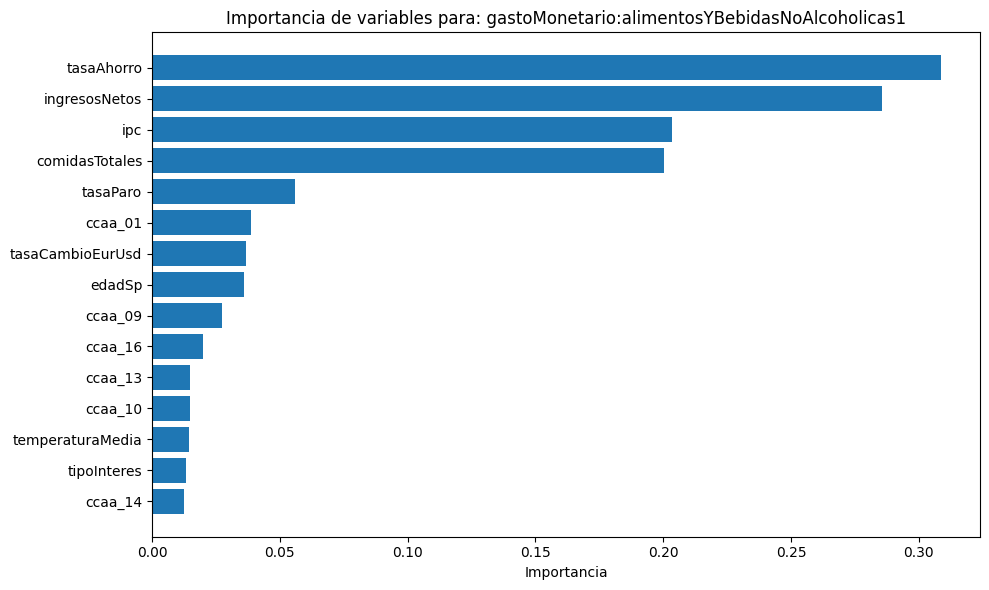

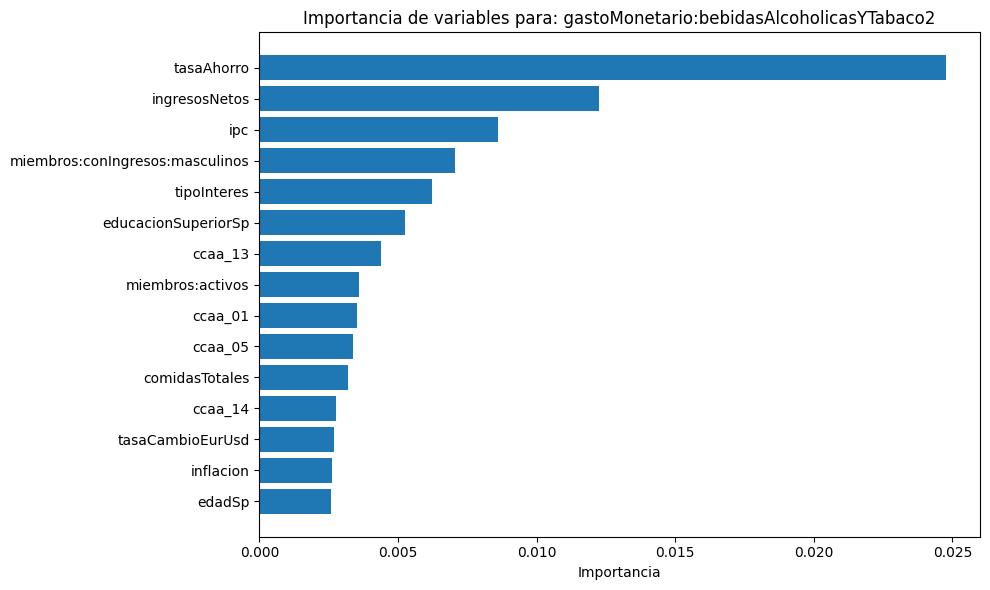

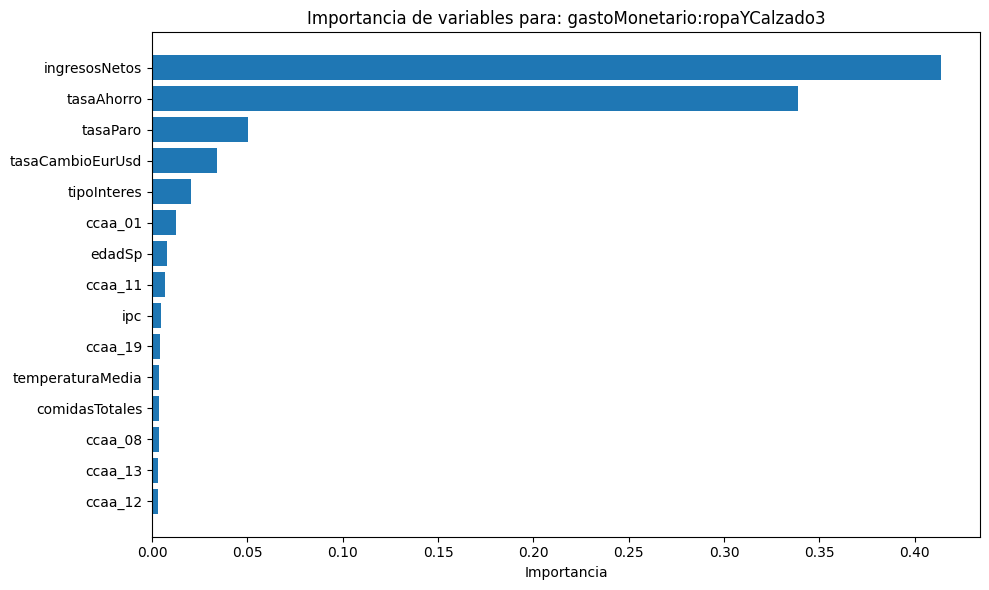

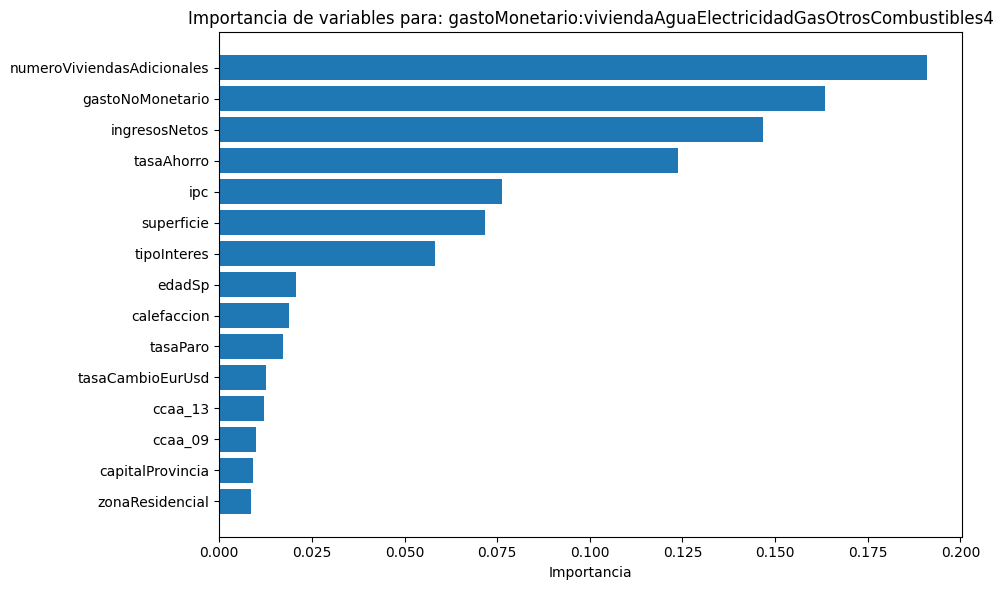

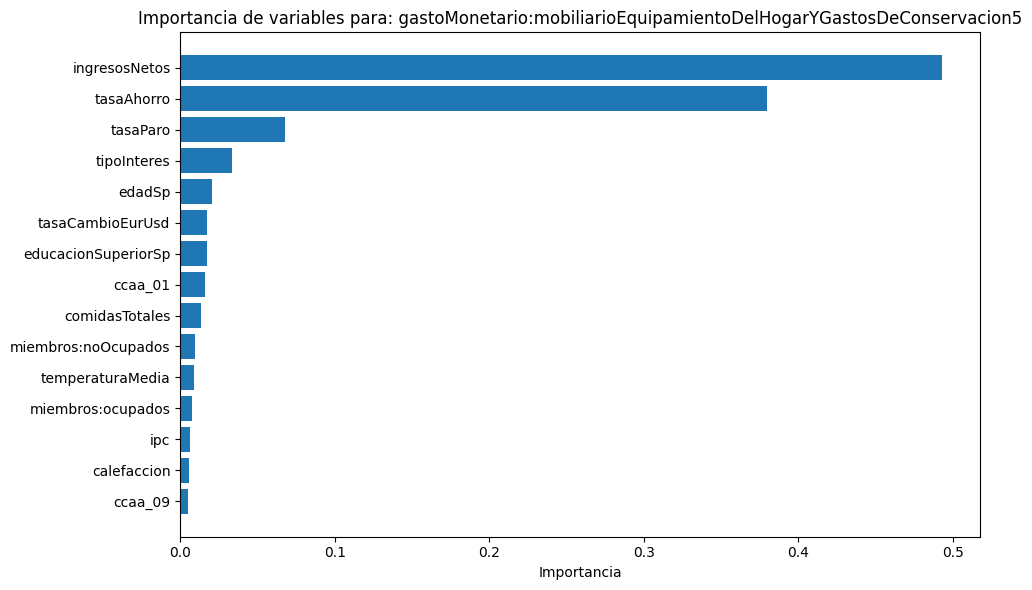

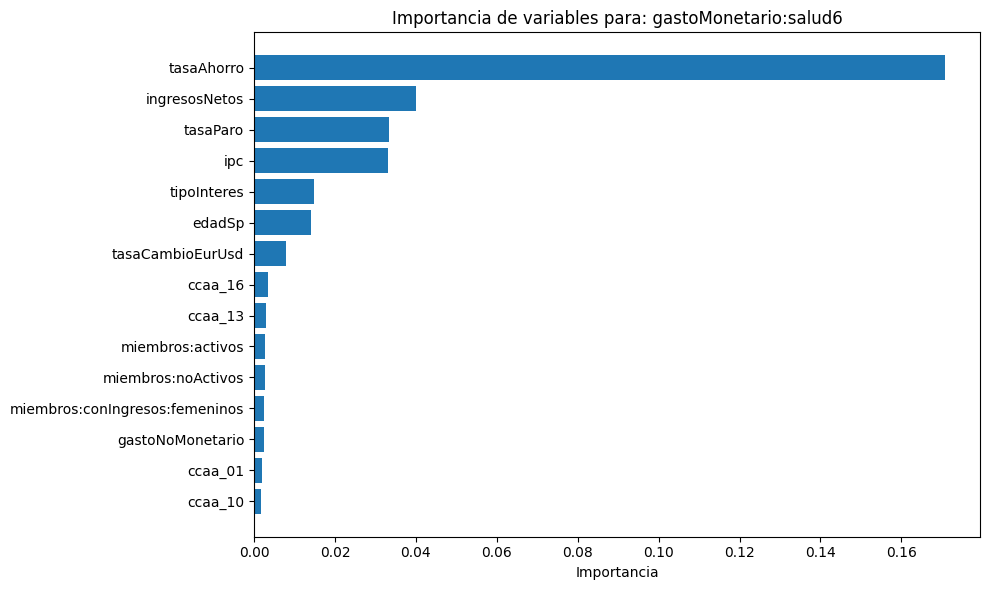

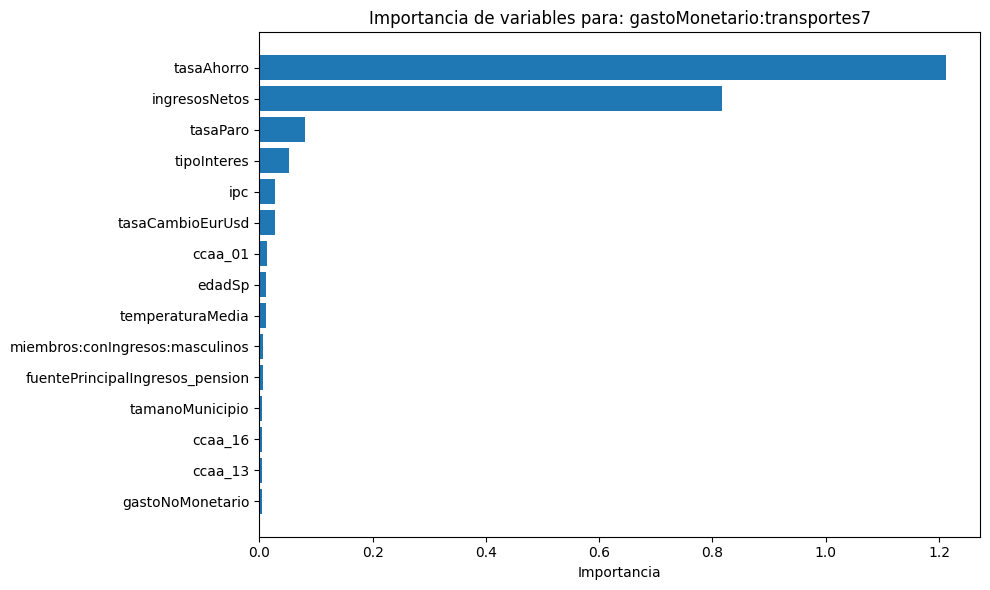

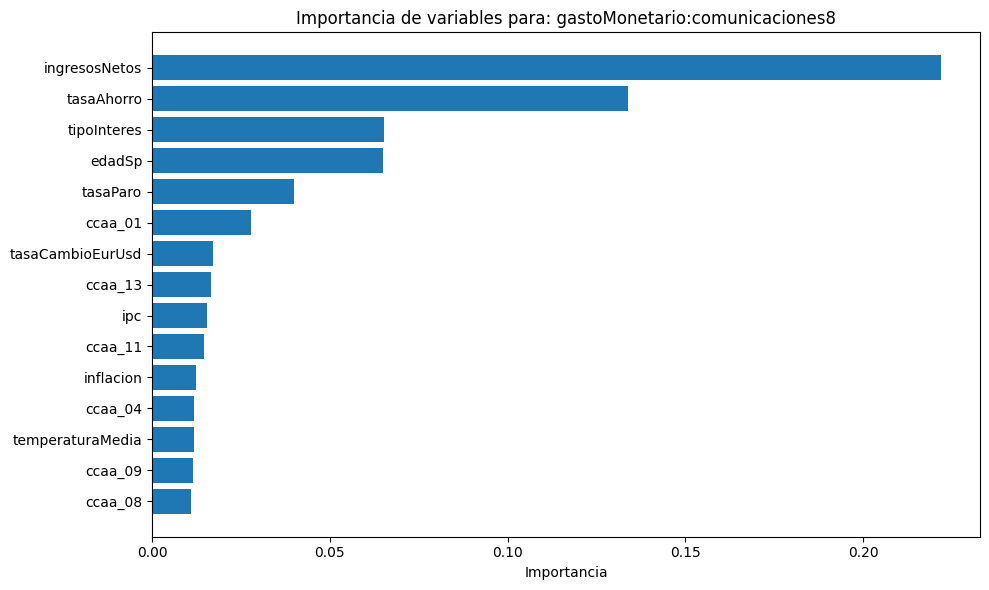

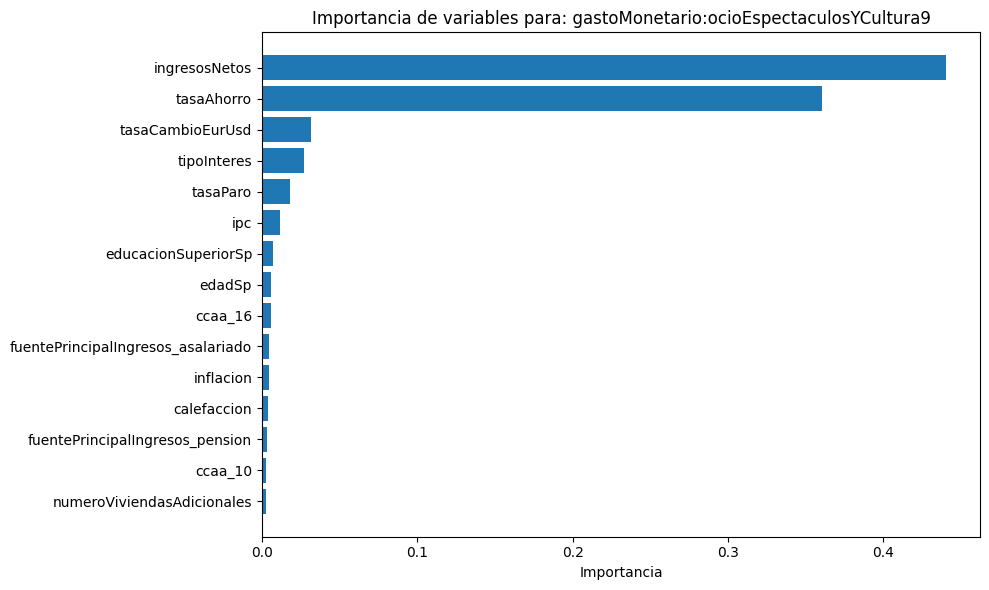

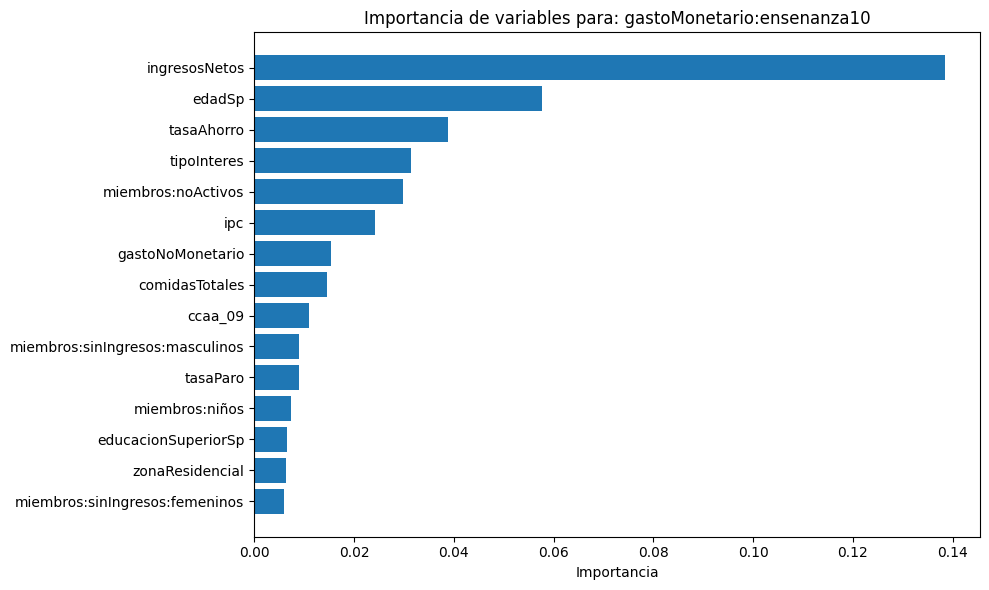

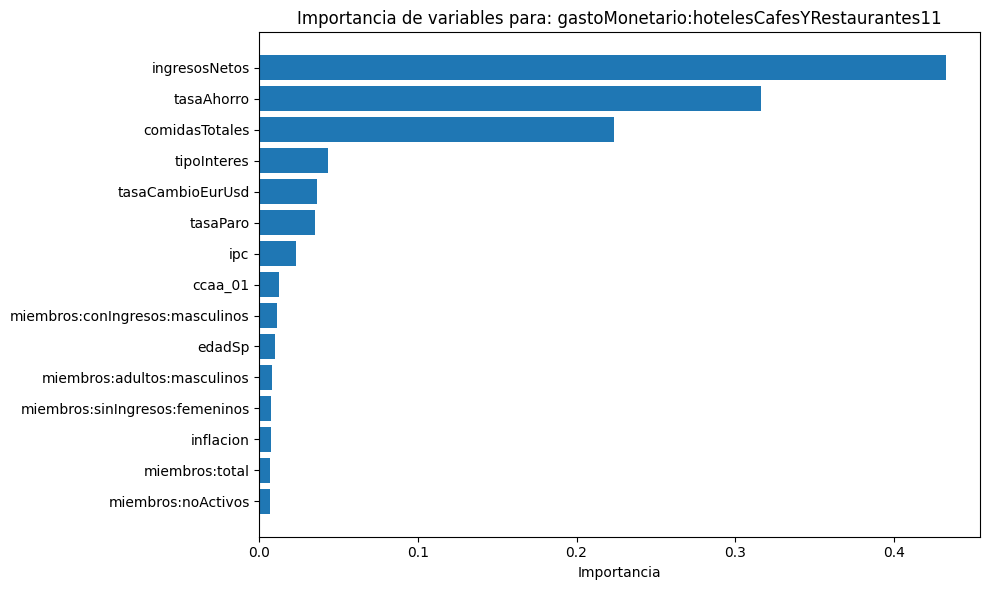

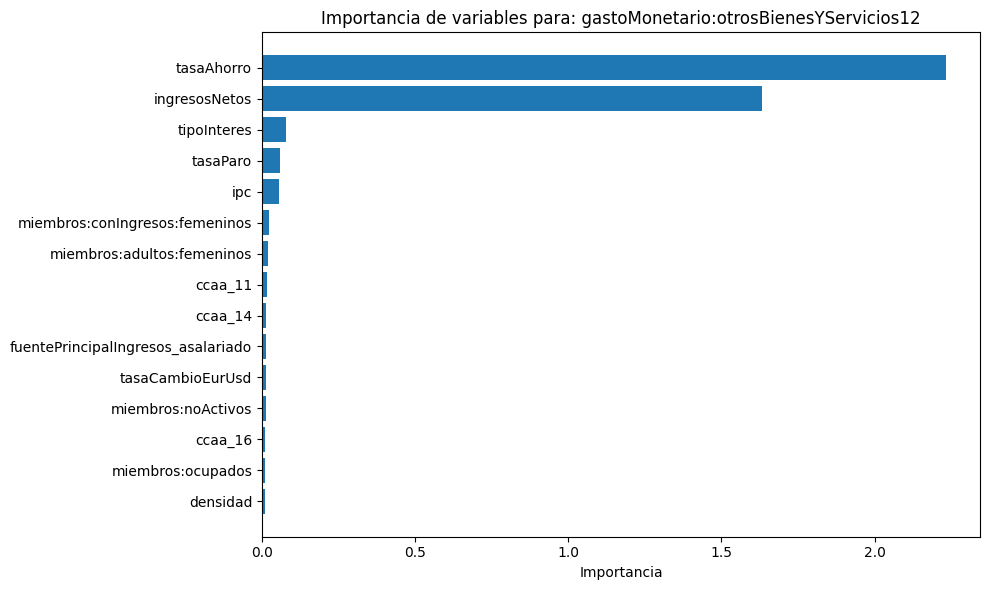

In [ ]:
plot_feature_importances_by_target(mlp_importances_df)

In [ ]:
# Save the coefficients DataFrame to a TSV file
mlp_importances_df.to_csv("../../datamarts/impotancia_por_categoria_no_lineal_supercategory.tsv", sep="\t", index=True)

In [ ]:
# Save the r2 DataFrame to a CSV file
mlp_r2_df.to_csv("../../datamarts/r2_por_categoria_no_lineal_supercategory.tsv", sep="\t", index=False)

In [ ]:
mlp_importances_df

,Variable,Importance,Target
0,tasaAhorro,0.308517,gastoMonetario:alimentosYBebidasNoAlcoholicas1
1,ingresosNetos,0.285557,gastoMonetario:alimentosYBebidasNoAlcoholicas1
2,ipc,0.203266,gastoMonetario:alimentosYBebidasNoAlcoholicas1
3,comidasTotales,0.200427,gastoMonetario:alimentosYBebidasNoAlcoholicas1
4,tasaParo,0.055978,gastoMonetario:alimentosYBebidasNoAlcoholicas1
...,...,...,...
739,ccaa_07,-0.007612,gastoMonetario:otrosBienesYServicios12
740,miembros:total,-0.008442,gastoMonetario:otrosBienesYServicios12
741,fuentePrincipalIngresos_autonomYRenta,-0.010763,gastoMonetario:otrosBienesYServicios12
742,superficie,-0.017583,gastoMonetario:otrosBienesYServicios12


In [ ]:
# ^Pivotear el DataFrame para que cada target tenga su propia columna de importancias
importances_pivoted = mlp_importances_df.pivot(index='Variable', columns='Target', values='Importance').reset_index()
importances_pivoted

Target,Variable,gastoMonetario:alimentosYBebidasNoAlcoholicas1,gastoMonetario:bebidasAlcoholicasYTabaco2,gastoMonetario:comunicaciones8,gastoMonetario:ensenanza10,gastoMonetario:hotelesCafesYRestaurantes11,gastoMonetario:mobiliarioEquipamientoDelHogarYGastosDeConservacion5,gastoMonetario:ocioEspectaculosYCultura9,gastoMonetario:otrosBienesYServicios12,gastoMonetario:ropaYCalzado3,gastoMonetario:salud6,gastoMonetario:transportes7,gastoMonetario:viviendaAguaElectricidadGasOtrosCombustibles4
0,aguaCaliente,-0.000068,-0.000025,0.000643,0.000093,-0.000014,0.000667,-0.000076,0.001111,0.000237,0.000191,0.000251,0.000194
1,calefaccion,0.003198,0.000560,0.001726,0.002711,0.003689,0.005894,0.003570,0.007684,0.002761,0.001147,0.002103,0.018791
2,capitalProvincia,0.001730,0.000228,0.001835,0.000400,0.002144,0.002141,0.001401,0.003051,0.000494,-0.000077,0.000981,0.009144
3,ccaa_01,0.038737,0.003505,0.027748,0.003740,0.012479,0.015997,0.002546,0.007314,0.012740,0.002022,0.013680,0.007972
4,ccaa_02,0.007413,0.001772,0.008082,0.001355,0.002313,0.003769,0.000261,-0.001875,0.000025,0.000899,0.001648,0.002595
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,tasaCambioEurUsd,0.036626,0.002704,0.017009,0.003413,0.036448,0.017274,0.031862,0.013495,0.033855,0.007858,0.026822,0.012538
58,tasaParo,0.055978,0.000982,0.039919,0.008912,0.034976,0.067890,0.017888,0.057470,0.050256,0.033288,0.080188,0.017204
59,temperaturaMedia,0.014557,0.000154,0.011753,0.002832,0.003969,0.009149,0.001734,0.005456,0.003557,0.000381,0.010884,0.006396
60,tipoInteres,0.013196,0.006236,0.065288,0.031444,0.043308,0.033258,0.027205,0.077090,0.020493,0.014920,0.052217,0.058292


### Mapa de calor de los coeficientes por código

In [ ]:
import seaborn as sns

In [ ]:
import re

def renombrar_columnas_por_codigo(df, ignore_cols=None):
    """
    Renombra las columnas extrayendo el código numérico de su final
    (p. ej. de 'gastoMonetario:alojamiento112' deja '112', etc.),
    pero omite renombrar cualquier columna cuyo nombre esté en ignore_cols.
    
    Parámetros:
    - df: DataFrame de pandas.
    - ignore_cols: lista de nombres de columnas a excluir (por defecto ['variable']).
    """
    if ignore_cols is None:
        ignore_cols = ['Variable']
        
    patron = re.compile(r'(\d+)$')  

    mapping = {}
    
    for col in df.columns:
        if col in ignore_cols:
            continue
        m = patron.search(col)
        if m:
            mapping[col] = m.group(1)
    
    return df.rename(columns=mapping)


In [ ]:
importances_pivoted

Target,Variable,gastoMonetario:alimentosYBebidasNoAlcoholicas1,gastoMonetario:bebidasAlcoholicasYTabaco2,gastoMonetario:comunicaciones8,gastoMonetario:ensenanza10,gastoMonetario:hotelesCafesYRestaurantes11,gastoMonetario:mobiliarioEquipamientoDelHogarYGastosDeConservacion5,gastoMonetario:ocioEspectaculosYCultura9,gastoMonetario:otrosBienesYServicios12,gastoMonetario:ropaYCalzado3,gastoMonetario:salud6,gastoMonetario:transportes7,gastoMonetario:viviendaAguaElectricidadGasOtrosCombustibles4
0,aguaCaliente,-0.000068,-0.000025,0.000643,0.000093,-0.000014,0.000667,-0.000076,0.001111,0.000237,0.000191,0.000251,0.000194
1,calefaccion,0.003198,0.000560,0.001726,0.002711,0.003689,0.005894,0.003570,0.007684,0.002761,0.001147,0.002103,0.018791
2,capitalProvincia,0.001730,0.000228,0.001835,0.000400,0.002144,0.002141,0.001401,0.003051,0.000494,-0.000077,0.000981,0.009144
3,ccaa_01,0.038737,0.003505,0.027748,0.003740,0.012479,0.015997,0.002546,0.007314,0.012740,0.002022,0.013680,0.007972
4,ccaa_02,0.007413,0.001772,0.008082,0.001355,0.002313,0.003769,0.000261,-0.001875,0.000025,0.000899,0.001648,0.002595
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,tasaCambioEurUsd,0.036626,0.002704,0.017009,0.003413,0.036448,0.017274,0.031862,0.013495,0.033855,0.007858,0.026822,0.012538
58,tasaParo,0.055978,0.000982,0.039919,0.008912,0.034976,0.067890,0.017888,0.057470,0.050256,0.033288,0.080188,0.017204
59,temperaturaMedia,0.014557,0.000154,0.011753,0.002832,0.003969,0.009149,0.001734,0.005456,0.003557,0.000381,0.010884,0.006396
60,tipoInteres,0.013196,0.006236,0.065288,0.031444,0.043308,0.033258,0.027205,0.077090,0.020493,0.014920,0.052217,0.058292


In [ ]:
def generar_mapa_calor_importancias(df, figsize=(22, 14), vmax=0.05, output_path=None):
    """
    Genera un mapa de calor con las columnas (códigos de gasto) ordenadas numéricamente.
    
    Args:
        df (pd.DataFrame): DataFrame con variables como filas y categorías como columnas.
        figsize (tuple): Tamaño de la figura.
        vmax (float): Valor máximo para la escala de color.
        output_path (str): Ruta opcional para guardar el mapa.
    """
    df_codificado = renombrar_columnas_por_codigo(df.copy())
    data = df_codificado.drop(columns=["Target", "Variable"], errors="ignore")
    data.index = df_codificado["Variable"] if "Variable" in df_codificado.columns else df_codificado.index

    # Reordenar columnas por valor numérico del código
    columnas_ordenadas = sorted(data.columns, key=lambda x: float(x.replace("_", ".")))
    data = data[columnas_ordenadas]

    plt.figure(figsize=figsize)
    ax = sns.heatmap(
        data,
        cmap="Reds",
        annot=True,
        fmt=".2f",
        linewidths=0.5,
        linecolor="gray",
        vmin=0,
        vmax=vmax,
        cbar_kws={"label": "Importancia relativa"}
    )

    plt.title("Mapa de calor de importancias por variable y categoría de gasto", fontsize=14)
    plt.xlabel("Código de Categoría de Gasto")
    plt.ylabel("Variable")
    plt.tight_layout()

    if output_path:
        plt.savefig(output_path, dpi=300)
    plt.show()

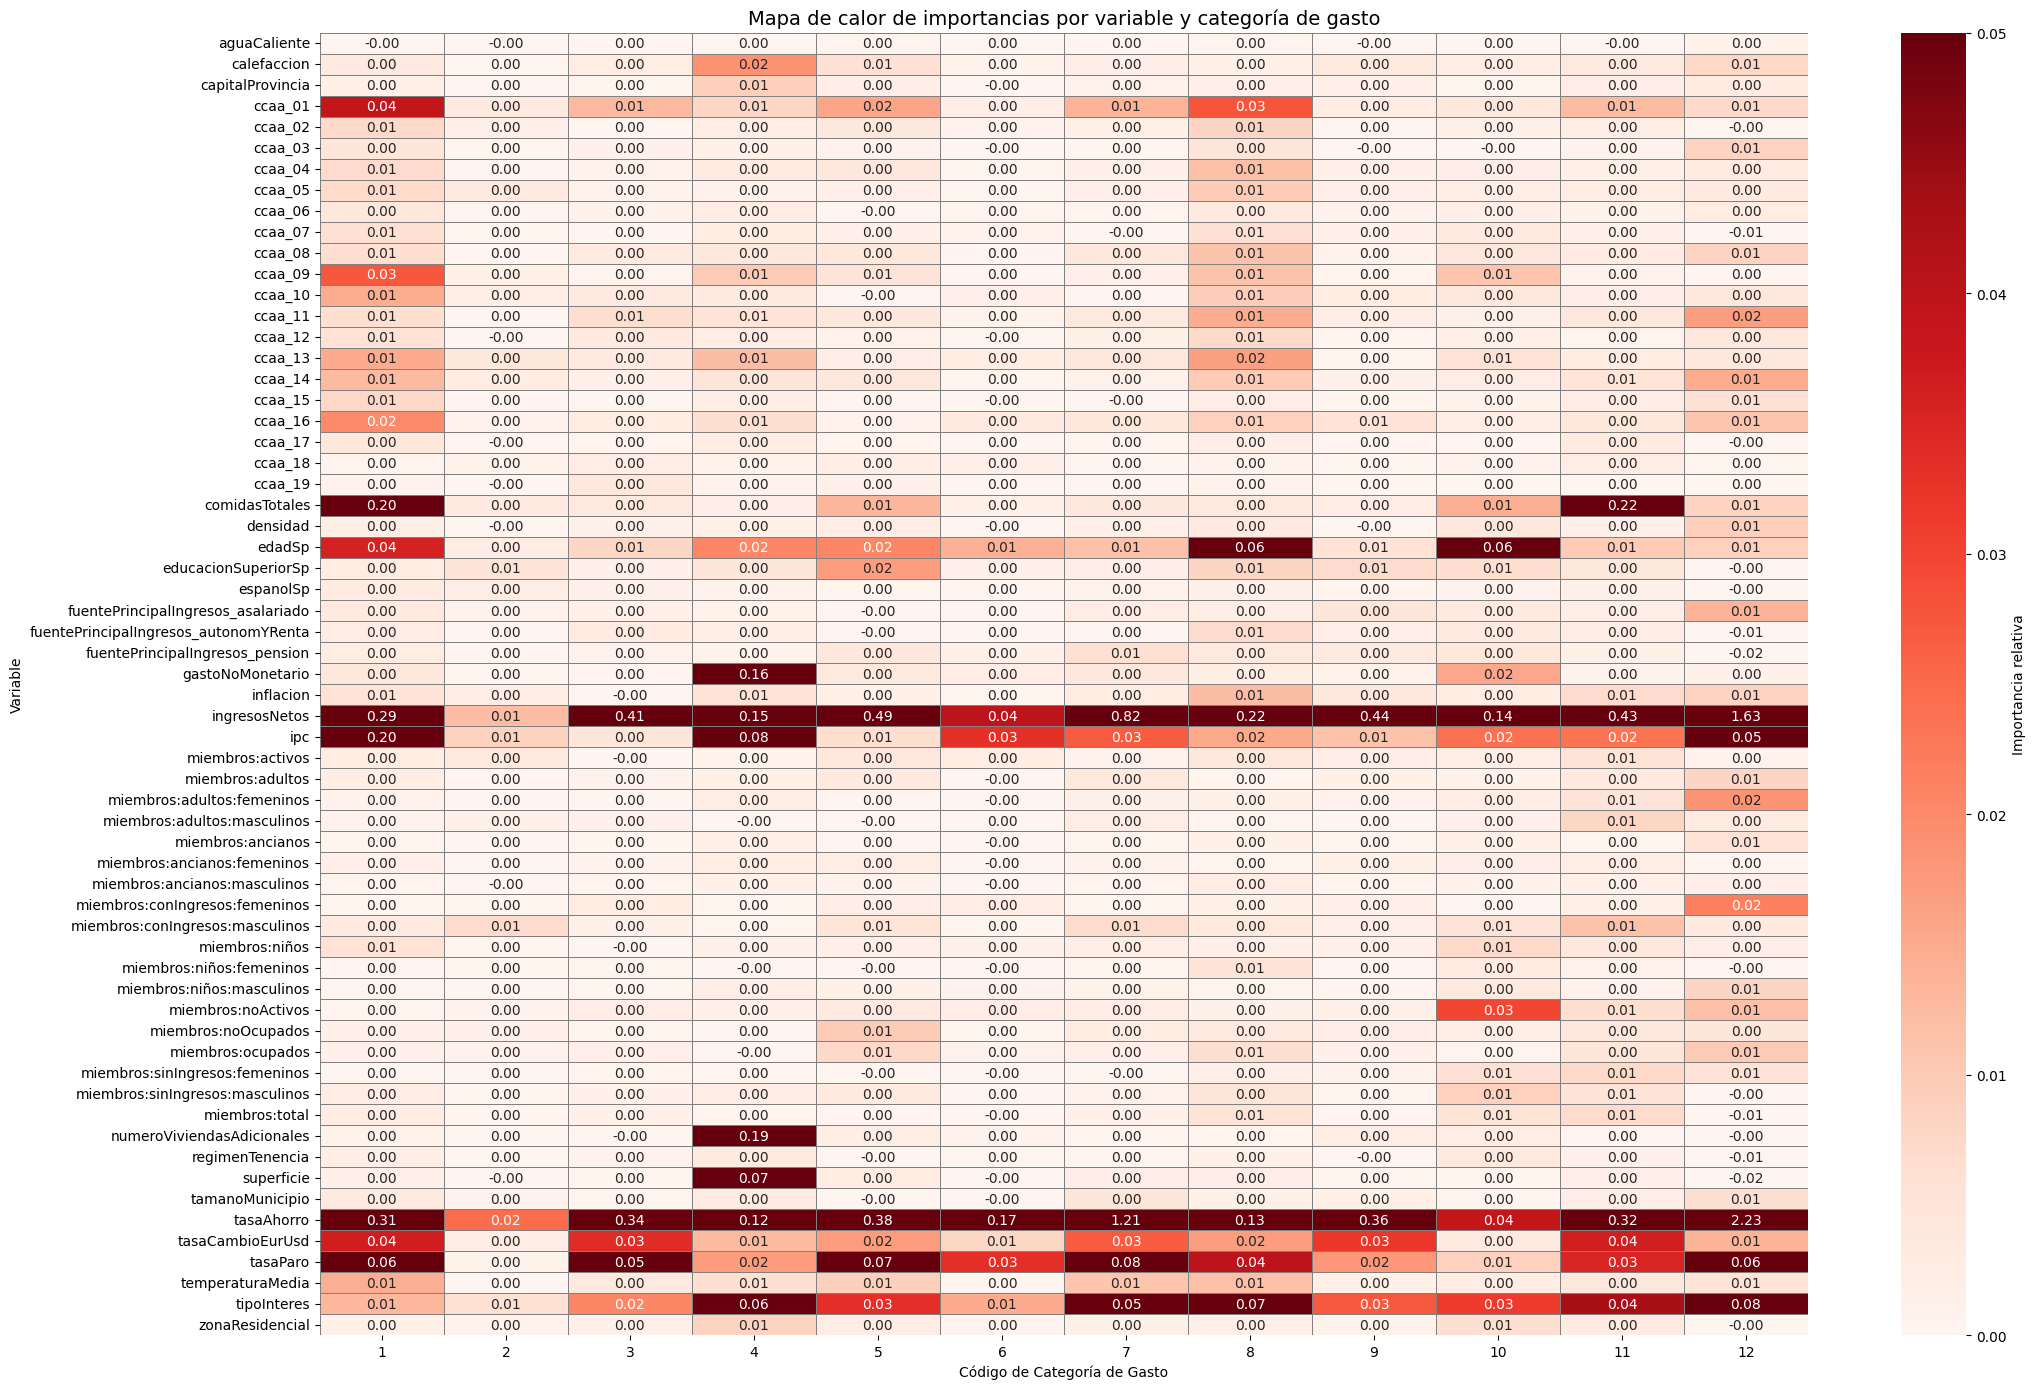

In [ ]:
generar_mapa_calor_importancias(importances_pivoted)